In [0]:
import pandas as pd

In [43]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [46]:
total_votos_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
total_votos_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [47]:
filmes_com_media_e_votos = filmes_com_media.join(total_votos_por_filme, on='filmeId')
filmes_com_media_e_votos = filmes_com_media_e_votos.rename(columns={'nota': 'total_votos'})
# filmes_com_media_e_votos.rename(columns={'nota': 'total_votos'}, inplace=True)
filmes_com_media_e_votos.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


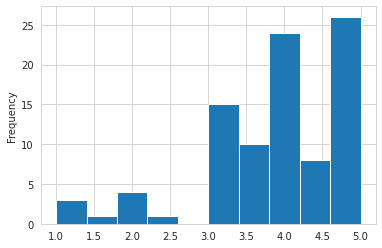

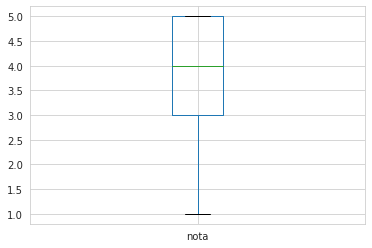

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [48]:
import matplotlib.pyplot as plt

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

# Desafio 1 
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

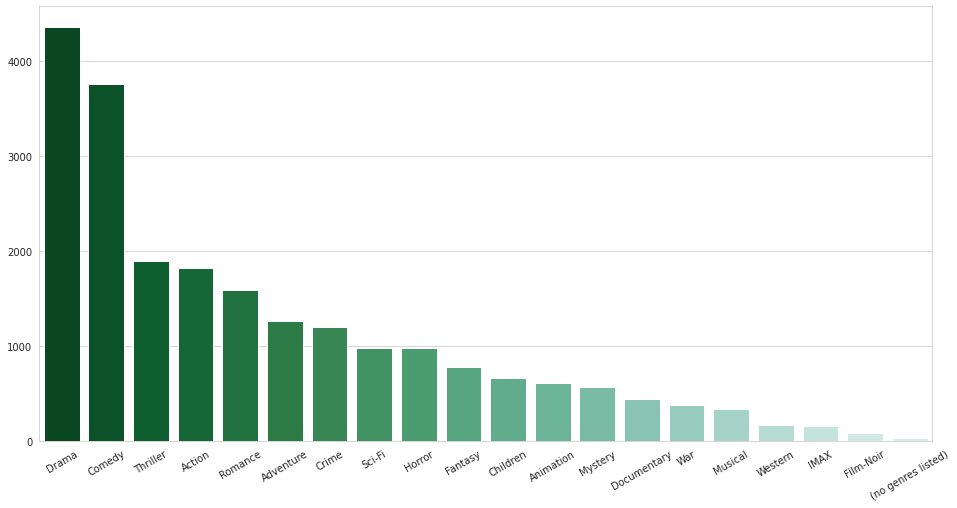

In [49]:
import seaborn as sns

sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.xticks(rotation=30)
plt.show()

# Desafio 2
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

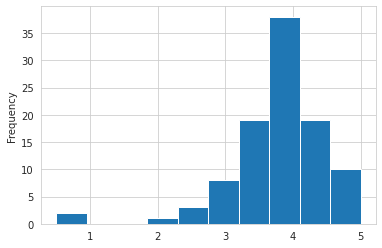

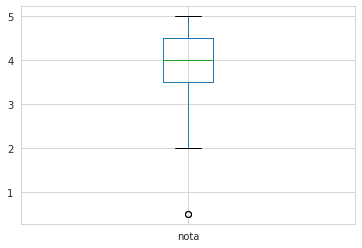

count    100.000000
mean       3.885000
std        0.787705
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [50]:
# V for Vendetta (2006)
plot_filme(44191)

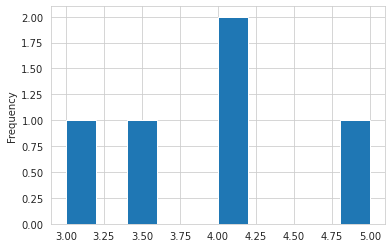

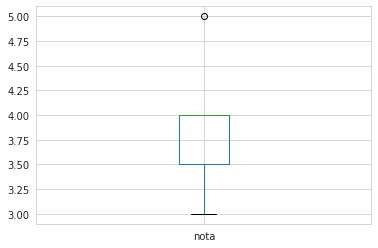

count    5.00000
mean     3.90000
std      0.74162
min      3.00000
25%      3.50000
50%      4.00000
75%      4.00000
max      5.00000
Name: nota, dtype: float64

In [51]:
# Solo: A Star Wars Story (2018)
plot_filme(187595)

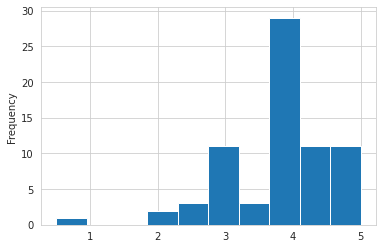

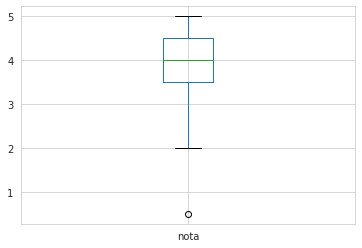

count    71.000000
mean      3.887324
std       0.858559
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [52]:
# Mary Poppins (1964) 	
plot_filme(1028)

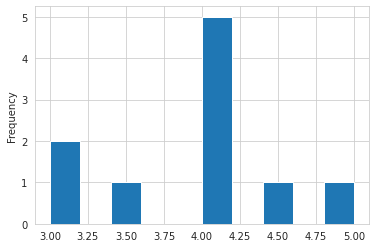

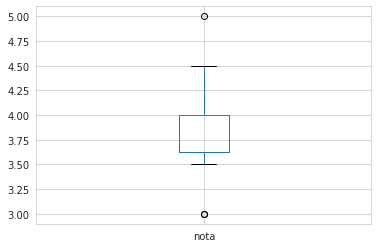

count    10.000000
mean      3.900000
std       0.614636
min       3.000000
25%       3.625000
50%       4.000000
75%       4.000000
max       5.000000
Name: nota, dtype: float64

In [53]:
# Futurama: Bender's Big Score (2007) 	
plot_filme(56251)

# Desafio 3 
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

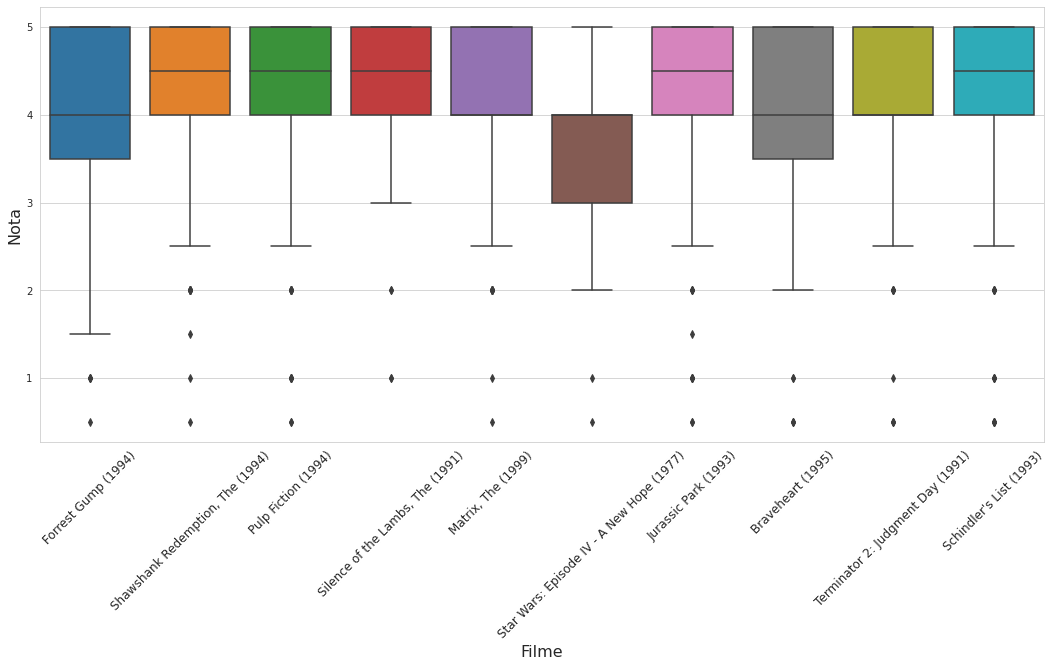

In [54]:
# filmes_com_media_e_votos vem do desafio da aula 01
top_10_votos_por_filme = filmes_com_media_e_votos.sort_values(by='total_votos', ascending=False).head(10)
top_10_votos_por_filme_titulos = top_10_votos_por_filme['titulo'].to_list()
top_10_votos_por_filme_ids = top_10_votos_por_filme['filmeId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {top_10_votos_por_filme_ids}"))
ax.set_xticklabels(top_10_votos_por_filme_titulos, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

# Desafio 4
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

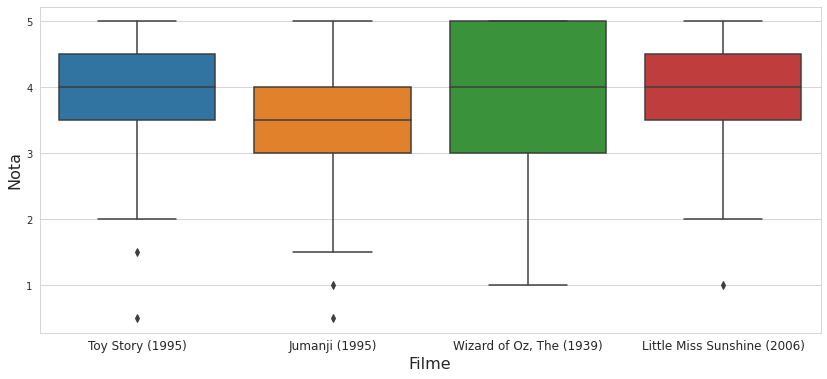

In [55]:
plt.figure(figsize=(14, 6))
grafico_com_nomes = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

grafico_com_nomes.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['titulo'], fontsize=12)
grafico_com_nomes.set_xlabel("Filme", fontsize=16)
grafico_com_nomes.set_ylabel("Nota", fontsize=16)
plt.show()

# Desafio 5
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print()
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print()

In [57]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

explora_filme(2041)
explora_filme(7541)
explora_filme(160080)

explora_filme(177593)
explora_filme(1178)
explora_filme(4334)


Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5


Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5


Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75


Filme: Condorman (1981)

Moda: [4.]
Média: 3.3333333333333335
Mediana: 4.0


Filme: 100 Girls (2000)

Moda: [3.5]
Média: 3.25
Mediana: 3.5


Filme: Ghostbusters (2016)

Moda: [3.  3.5]
Média: 3.125
Mediana: 3.25


Filme: Three Billboards Outside Ebbing, Missouri (2017)

Moda: [4.5 5. ]
Média: 4.75
Mediana: 4.75


Filme: Paths of Glory (1957)

Moda: [5.]
Média: 4.541666666666667
Mediana: 4.75


Filme: Yi Yi (2000)

Moda: [5.]
Média: 4.6
Mediana: 5.0



# Desafio 6 
Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

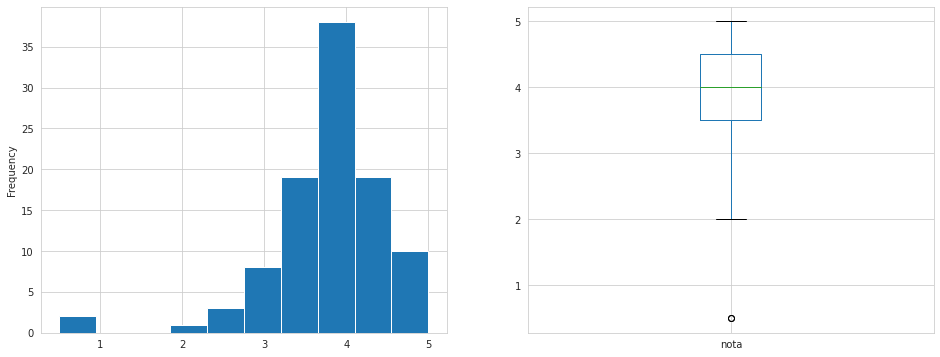

In [58]:
v_vendetta = avaliacoes.query('filmeId == 44191')['nota']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

v_vendetta.plot(kind='hist', ax=axes[0])
v_vendetta.plot(kind='box', ax=axes[1])

plt.show()

# Desafio 7
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [59]:
filmes_com_media_e_ano = filmes_com_media.copy()
filmes_com_media_e_ano['ano'] = filmes_com_media['titulo'].str.extract("\((\d{4})\)")
filmes_com_media_e_ano.head()

,filmeId,titulo,generos,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


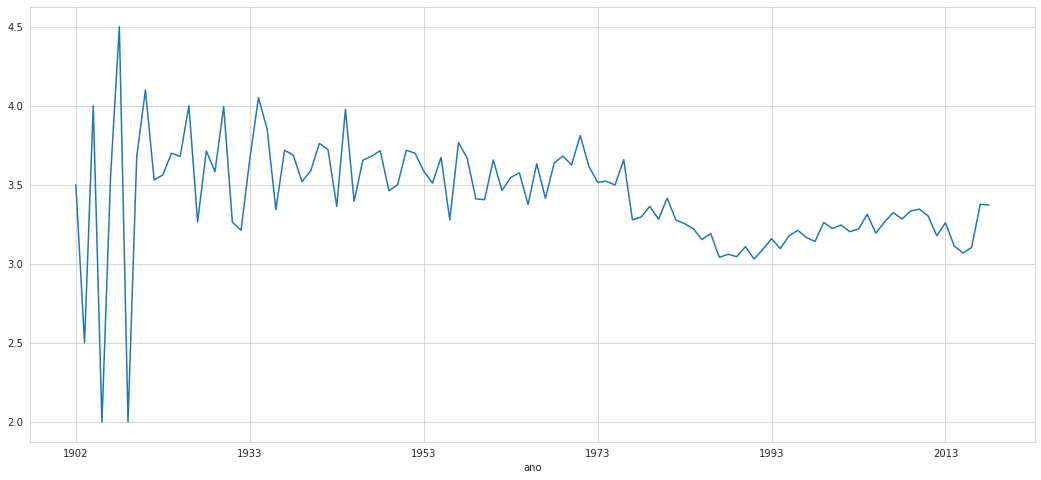

In [60]:
nota_media_por_ano = filmes_com_media_e_ano.groupby('ano')['nota_media'].mean()

plt.figure(figsize=(18, 8))
nota_media_por_ano.plot()